<a href="https://colab.research.google.com/github/KoushikProject/Data_Visualizations/blob/main/Twitter_New_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('Downloads/archive/twitterdata.csv.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

In [ ]:
df.head(50)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [ ]:
data=df[['text','target']]
data['target'] = data['target'].replace(4,1)

C:\Users\Koushik.Rangarajan\AppData\Local\Temp\ipykernel_2620\628500252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [ ]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [ ]:
data_neg.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [ ]:
dataset = pd.concat([data_pos, data_neg])
dataset.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
len(stopwordlist)

136

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Koushik.Rangarajan\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
en_stopwords = set(stopwords.words("english"))

In [ ]:
len(en_stopwords)

179

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [ ]:
dataset1 = pd.concat([data_pos, data_neg])

In [ ]:
X = dataset1['text']
y = dataset1['target']

In [ ]:
STOPWORDS = set(stopwordlist)
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
import nltk
st = nltk.PorterStemmer()
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()

def getcleanedtext(text):
    text=text.lower()
    def cleaning_stopwords(text):
        return " ".join([word for word in str(text).split() if word not in en_stopwords])
    stop_word_removal = cleaning_stopwords(text)
    
    def cleaning_punctuations(text):
        translator = str.maketrans('', '', punctuations_list)
        return text.translate(translator)
    punctuation_removal = cleaning_punctuations(stop_word_removal)
    
    def cleaning_repeating_char(text):
        return re.sub(r'(.)1+', r'1', text)
    repeating_char_removal = cleaning_repeating_char(punctuation_removal)
    
    def cleaning_URLs(data):
        return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
    clean_url = cleaning_URLs(repeating_char_removal)
    
    def cleaning_numbers(data):
        return re.sub('[0-9]+', '', data)
    clean_numbers = cleaning_numbers(clean_url)
    
    def stemming_on_text(data):
        text = [st.stem(word) for word in data]
        return data
    stemming = stemming_on_text(clean_numbers)
    
    def lemmatizer_on_text(data):
        text = [lm.lemmatize(word) for word in data]
        return data
    lemmatize = lemmatizer_on_text(stemming)
    
    tokens=tokenizer.tokenize(lemmatize)
    clean_text=' '.join(tokens)
    return clean_text


# Function to preprocess Reviews data
#def preprocess_Reviews_data(data,name):
    # Proprocessing the data
#    data[name]=data[name].str.lower()
    # Code to remove the Hashtags from the text
#    data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
#    data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text 
#    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
#    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    # Code to remove all the single characters in the text
#    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    # Remove the twitter handlers
#    data[name]=data[name].apply(lambda x:re.sub('@[^\s]+','',x))


# Function to tokenize and remove the stopwords    
#def rem_stopwords_tokenize(data,name):
      
#    def getting(sen):
#        example_sent = sen

#        filtered_sentence = [] 

#       stop_words = set(stopwords.words('english')) 

#        word_tokens = word_tokenize(example_sent) 
        
#        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        
#        return filtered_sentence
    # Using "getting(sen)" function to append edited sentence to data
#    x=[]
#    for i in data[name].values:
#        x.append(getting(i))
#    data[name]=x

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Koushik.Rangarajan\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Koushik.Rangarajan\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
x_clean=[getcleanedtext(i) for i in X]

In [ ]:
x_clean

['love healthuandpets u guys r best',
 'im meeting one besties tonight cant wait girl talk',
 'darealsunisakim thanks twitter add sunisa got meet hin show dc area sweetheart',
 'sick really cheap hurts much eat real food plus friends make soup',
 'lovesbrooklyn effect everyone',
 'productoffear tell burst laughing really loud thanks making come sulk',
 'rkeithhill thans response ihad already find answer',
 'keepinupwkris jealous hope great time vegas like acms love show',
 'tommcfly ah congrats mr fletcher finally joining twitter',
 'evoip responded stupid cat helping type forgive errors',
 'crazy day school hours straiiight watch hills spencerpratt told too ha happy birthday jb',
 'naughtyhaughty forget two half men love show',
 'nileyjileyluver haha worry get hang it',
 'soundwav least one feeling lost may cause many later usual nights already addicting',
 'lutheranlucciol make sure dm post link video ltlolgtso miss better get permission blessing first',
 'added tweetie new iphone',


In [ ]:
dataset1.head()
len(dataset1)

40000

In [ ]:
y

800000    1
800001    1
800002    1
800003    1
800004    1
         ..
19995     0
19996     0
19997     0
19998     0
19999     0
Name: target, Length: 40000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_clean,y,test_size = 0.05, random_state =26105111)

In [ ]:
print(X_train)

['saad late right time', 'tough time getting uni work done rather run away new york become famous photographer right now', 'totally perfect theme quotappropriatequot blog cant find link', 'therealgage find truth that hope true all', 'mums parents wonderfully sarcastic know get sense humour', 'scared mirrors damnit', 'sipping southern comfort gods love stuff', 'road trip axed gotta catch things around here like springtini and spring cleaning', 'cheesecake httptwitpiccomjsu', 'http', 'sencationdrop congrats great change coming hope wellll loveeeee', 'theroser see me considering live hours away', 'cajuntechie good song', 'nickcarter waiting anticipation great joke studying big exam tomorrow hurry', 'rickbakas worked admin stuff basement office mary amp got takeout chinese sat fire night', 'kalpenn arrrggghhh seen last nights episode yet pity lose you though', 'ddlovato hihow long london uni lectures show wednesday', 'matthewkempster know aol suck software sucks connection quotjitteryquot'

In [ ]:
print(X_test)

['sachiclayton welcome home love sach', 'reneasaurus either day works me', 'jelly beans easter basket', 'brucewayne agreed last tweetpeople understand life controlabout time', 'karmadillo bad bad bought single easter egg yet family bad books dog missing extra long walks', 'internet cafe somewhere los banosneed submit something', 'maybe time start planning photography bbq ive thinking', 'feeling sick again', 'im gonna try sleep im kinda tired time wonderful bed waiting me sick strep throat nightlt', 'really wish could sleep', 'keep working places cyclework scheme disc halfauds good enough', 'priscillacruz funny watched only strong today chances miss capoeira zoom zoom', 'hematocrit serious', 'meghankathleen enjoy weekend finally sent facebook page feedback reply earlier discussion fun hiking', 'know im soo tierd great day today though gonna stay home maybe watch movie', 'honestly really really really miss ca', 'seeing eno thursday brian eno amp j peter schwalm ï ½ like pictures pt ntnet

In [ ]:
print(y_train)

800277    1
813919    1
19019     0
12295     0
807639    1
         ..
804041    1
2220      0
11553     0
15229     0
818431    1
Name: target, Length: 38000, dtype: int64


In [ ]:
print(y_test)
outcome = y_test

815686    1
812662    1
13733     0
817017    1
3942      0
         ..
808509    1
10387     0
2425      0
807911    1
804712    1
Name: target, Length: 2000, dtype: int64


# TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(X_test)

  (0, 235175)	0.7392039569558598
  (0, 235128)	0.46779921152261167
  (0, 124657)	0.32636901702087995
  (0, 93050)	0.3580847280301782
  (1, 241289)	0.6690469046333376
  (1, 241256)	0.44320639353773195
  (1, 131765)	0.3191239291537606
  (1, 57224)	0.43496928501171706
  (1, 45801)	0.2547665030291229
  (2, 107063)	0.4746449323428817
  (2, 107060)	0.45229653962066
  (2, 56022)	0.3258196688554937
  (2, 17221)	0.4440365547366751
  (2, 16447)	0.5165395530768948
  (3, 225249)	0.5039948980982146
  (3, 214323)	0.3061133662905141
  (3, 118377)	0.40231944308501577
  (3, 115281)	0.34060552310474707
  (3, 2867)	0.6118910793724355
  (4, 245674)	0.14849650876718043
  (4, 231010)	0.25152109578247583
  (4, 190000)	0.20392185473685148
  (4, 136574)	0.1616167391525538
  (4, 123086)	0.27985155140606444
  (4, 122914)	0.14380808023747857
  :	:
  (1997, 138673)	0.4780469513568999
  (1997, 60470)	0.2708261540146035
  (1997, 48585)	0.5202418519140192
  (1998, 242060)	0.22961758226089032
  (1998, 241901)	0.145426

In [ ]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred1 = BNBmodel.predict(X_test)

In [ ]:
y_pred1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [ ]:
outcome_comparison=pd.DataFrame()

In [ ]:
outcome_comparison['actual'] = outcome

In [ ]:
outcome_comparison['predicted']= y_pred1

In [ ]:
outcome_comparison

,actual,predicted
815686,1,1
812662,1,1
13733,0,1
817017,1,0
3942,0,0
...,...,...
808509,1,1
10387,0,0
2425,0,0
807911,1,1


              precision    recall  f1-score   support

           0       0.72      0.79      0.75       991
           1       0.77      0.70      0.73      1009

    accuracy                           0.74      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.75      0.74      0.74      2000



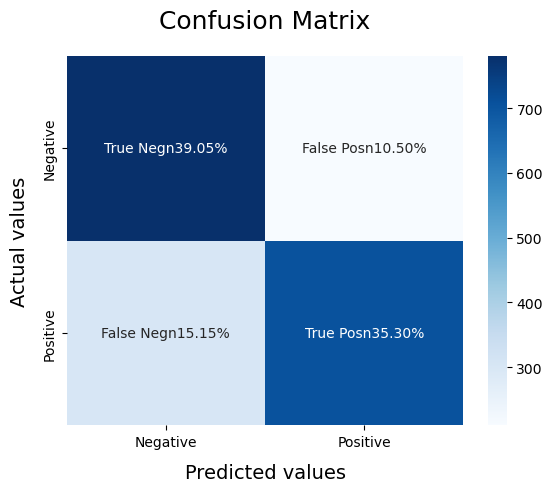

In [ ]:
model_Evaluate(BNBmodel)

In [ ]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df1 = pd.read_csv('Desktop/test.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

In [ ]:
df1.head()
xtesting = df1['text']

In [ ]:
xtesting_clean = [getcleanedtext(i) for i in xtesting]

In [ ]:
xtesting_clean

['myheartandmind jo jen nemuselo zrovna tã â holce ael co nic',
 'another commenting contest yay httptinyurlcommjan',
 'thrillmesoon figured see tweets facebook status updates set groups seemed like pain set up',
 'oxhot theri tomorrow drinking coffee talking important favourite issue know mean',
 'heard first were girl hope looks wendys brains kidding babe',
 'ur lead singer band beware falling prey lsd quotlead singer diseasequot httptinyurlcomnxjt music haveyouever',
 'tarayqueen much ads blog',
 'lara neveer think get well other',
 'royeveritt ha good job thats right gotta throw bigrun tag everywhere wanna get trending start',
 'mshiphop im glad ur well',
 'wooooo xbox back',
 'rmedina latati mmmm sounds absolutely perfect schedule full time lay bed sunday ugh',
 'recovering long weekend',
 'scoobygritboys',
 'cliffforster yeah work better waiting end wonder time keep good blog',
 'woke up school best feeling ever',
 'thewdbcom cool hear old walt interviews ã â â httpblipfmbmta',
 

In [ ]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
dfsource = pd.read_csv('Downloads/archive/twitterdata.csv.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

In [ ]:
dfsource.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
X = dfsource['text']
y = dfsource['target'].replace(4,1)

In [ ]:
X

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [ ]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64

In [ ]:
x_clean = [getcleanedtext(i) for i in X]

In [ ]:
x_clean

['switchfoot httptwitpiccomzl a s bummer shoulda got david carr third day it d',
 'upset cant update facebook texting it might cry result school today also blah',
 'kenichan dived many times ball managed save rest go bounds',
 'whole body feels itchy like fire',
 'nationwideclass no behaving all im mad here cant see there',
 'kwesidei whole crew',
 'need hug',
 'loltrish hey long time see yes rains bit only bit lol im fine thanks hows',
 'tatianak nope',
 'twittera que muera',
 'spring break plain city snowing',
 'repierced ears',
 'caregiving bear watch it thought ua loss embarrassing',
 'octolin counts idk either never talk anymore',
 'smarrison wouldve first gun really though zac snyders doucheclown',
 'iamjazzyfizzle wish got watch you miss iamlilnicki premiere',
 'hollis death scene hurt severely watch film wry directors cut now',
 'file taxes',
 'lettya ahh ive always wanted see rent love soundtrack',
 'fakerpattypattz oh dear drinking forgotten table drinks',
 'alydesigns day ge

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_clean)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
x_vec = vectoriser.transform(x_clean)

In [ ]:
x_vec

<1600000x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 16698288 stored elements in Compressed Sparse Row format>

In [ ]:
xt_vec = vectoriser.transform(xtesting_clean)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_vec, y)
y_pred1 = BNBmodel.predict(xt_vec)

In [ ]:
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [ ]:
outcome_comparison1=pd.DataFrame()
outcome_comparison1['actual'] = df1['target'].replace(4,1)
outcome_comparison1['predicted']= y_pred1

In [ ]:
outcome_comparison1

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1
